# TP 6: La méthode des éléments finis pour les équations élliptiques 1D

Dans ce TP, on s'intéresse à la résolution approchée de problèmes aux limites pour des équation elliptiques en dimension 1, par la
méthode des éléments finis.

## 1. Un problème avec conditions aux limites de Dirichlet homogènes.

On s'intérèsse au problème :

$$
(P)\left\{\begin{aligned}
&-u''(x)+u(x)=f(x),\ x\in ]0,1[,\\
&u(0)=u(1)=0,
\end{aligned}
\right.
$$
où $f:[0,1]\longrightarrow\mathbb{R}$ est une fonction de classe $\mathcal{C}^2$ donnée. Dans ces conditions, on peut montrer que le problème $(P)$ admet une unique solution de classe $C^2.$

On considère l'espace  
$$ 
V:=H^1_0(]0,1[) = \left\{ v \in L^2(]0,1[)\,:\, v' \in L^2(]0,1[),\ 
v(0)=v(1)=0 \right\}.
$$

**Q1)** Écrire la formulation variationnelle du problème $(P)$ sous la forme 
\begin{equation*}
(Pv)\ \ \ 
\begin{cases}
u\in V  \,\textrm{tel que}\\
a(v,u)=L(v),\ \,\forall\ v\in V ,
\end{cases}
\end{equation*}
où $a$ est une forme bilinéaire dans $V$  et $L$ une forme linéaire de $V,$ que l'on explicitera. Montrer que le problème $(Pv)$ admet une unique solution.

**Résolution.**
La formulation variationnelle de $(P)$ s'écrit sous la forme $(Pv)$ avec 
$$
a(v,u)=\int_0^1u'(x)v'(x)dx+\int_0^1u(x)v(x)dx,\ \ \ \ \ \ L(v)=\int_0^1f(x)v(x)dx.
$$
On peut montrer que $a$ est une aplication bilinéaire continue et coercive dans $V\times V$ et que $L$ est une aplication linéaire continue sur $V,$ et appliquer le théorème de Lax-Milgram pour conclure que $(Pv)$ admet une et une seule solution.

L'idée de la méthode des éléments finis est de chercher une solution approchée de $(Pv)$ dans un sous-espace vectoriel de dimension finie $n\in\mathbb{N}$, que l'on note $V^n.$ Autrement dit, on cherche $u^n\in V^n$ tel que
$$
(P_nv)\ \ \ \ \ \ \ \ \ a(v^n,u^n)=L(v^n),\ \,\forall\ v^n\in V^n. 
$$

**Q2)** Soit $(\phi_1,\dots,\phi_n)$ une base de $V^n.$ Montrer que $u^n=\displaystyle{\sum_{i=1}^n u_i\phi_i}$ est solution de $(P_nv)$ si et seulement si le vecteur $U=(u_1,\dots,u_n)^T$ est solution d'un système linéaire 
$$
KU+MU=F,
$$
où $K$ et $M$ sont des matrices de $\mathcal{M}_n(\mathbb{R})$ et $F$ un vecteur de $\mathbb{R}^n$ que l'on explicitera.

** Résolution.**
Comme $(\phi_1,\dots,\phi_n)$ est une base de $V^n,$ $u^n$ est solution de $(P_nv)$ ssi 
$$
a(\phi_i,u^n)=L(\phi_i),\ \ \forall i=1,\dots, n,
$$
i. e. ssi
$$
a(\phi_i,\sum_{j=1}^n u_j\phi_j)=L(\phi_i)\Leftrightarrow
\sum_{j=1}^n u_j a(\phi_i,\phi_j)=L(\phi_i),\ \ \forall i=1,\dots, n,
$$
autrement dit ssi
$$
A U = F,
$$
où $A$ est la matrice de taille $n\times n$ définie par $A_{i,j}=a(\phi_i,\phi_j)$ et $F$ le vecteur de $\mathbb{R}^n$ défini par 
$$
F_i=L(\phi_i)=\int_0^1f(x)\phi_i(x)dx. 
$$
On peut alors écrire $A=K+M,$ avec 
$$
K_{i,j}=\int_0^1\phi_i'(x)\phi_j'(x)dx,\ \ \ M_{i,j}=\int_0^1\phi_i(x)\phi_j(x)dx.
$$


**Choix de l'espace $V^n$**
On commence par discrétiser l'intervalle $]0,1[$ en $n+1$ sous-intervalles $]x_i,x_{i+1}[,\ i=0,\dots,n,$ où $x_i=ih,$ avec $h=\frac{1}{n+1}$ le pas de la discrétisation.
Le principe de la méthode des éléments finis P1 consiste à considérer $V^n$ le sous-espace de $V$ des fonctions affines par morceaux, polynômes de degré 1 dans les intervalles $[x_i,x_{i+1}],$ c'est-à-dire  
$$ 
V^n:=V_h \ = \left \{ v_h \in C^0([0,1])\,\,:\,\ v_h\ \textrm{est affine sur } {[x_i,x_{i+1}]}  \textrm{ et } v_h(0)=v_h(1)=0 \right \} .
$$

**Q3)** Vérifier que $V_{h}$ est un espace de dimension finie $n,$ dont une base est formée par les fonctions $\,\psi_{i}$, $i=1,...,n,\ $ définies par
$\psi_{i}(x_{j})=\delta_{i,j},$ soit 
$$
\psi_{i}(x)= 
\begin{cases}
\frac{x-x_{i-1}}{x_{i}-x_{i-1}},  &  \textrm{si } x_{i-1} \le  x \le  x_{i},  \\
\frac{x-x_{i+1}}{x_{i}-x_{i+1}},  &  \textrm{si } x_{i} \le  x \le x_{i+1},  \\
0,  &  \textrm{sinon.}  
\end{cases}
$$

Les fonctions $\psi_i$ sont communément appelées *fonctions chapeau.*

**Q4)** Calculer explicitement en fonction de $h$ les coefficients des matrices $K$ et $M.$ Donner l'expression des coefficients $F_i$ du vecteur $F$ et calculer une valeur approchée de $F_i$ par la méthode des trapèzes. 

** Résolution.**

Les matrices $K$ et $M$ sont les matrices tridiagonales définies par
$$
K_{i,i}=\frac2h,\ \ \ K_{i,i-1}=K_{i,i+1}=-\frac1h,\ \ \ K_{i,j}=0,\ \textrm{si } |j-i|\ge2 ;
$$
$$
M_{i,i}=2\frac h3,\ \ \ M_{i,i-1}=M_{i,i+1}=\frac h6,\ \ \ M_{i,j}=0,\ \textrm{si } |j-i|\ge2.
$$
Si on approche $F_i$ par la méthode des trapèzes, on obtient $F_i\approx h f(x_i).$

**Q5) Implémentation en python.**
Ecrire des fonctions $K(n)$ et $M(n)$ calculant les matrices $K$ et $M.$ Ecrire une fonction $F(n)$ calculant une valeur approché du vecteur $F$ en utilisant la méthode des trapèzes. Ecrire un programme donnant la solution approchée $u_h$ de $(P_v)$ dans le cas $f=1$ et $f=(1+\pi^2)\sin(\pi x).$ 

Représenter, dans les deux cas, la solution approchée et la solution exacte. Pour cela, remarquer que

*i)* La solution de $(P)$ pour $f=1$ est donnée par
$$
u(x)=1-\frac{e^x+e^{1-x}}{1+e} ;
$$
*ii)* La solution de $(P)$ pour $f=(1+\pi^2)\sin(\pi x)$ est donnée par $u(x)=\sin(\pi x).$

**Q6)** Soit $\Pi_h u=\displaystyle{\sum_i=1^n u(x_i)\Psi_i}$ l'interpolé $P1$ de la solution exacte $u$ de $(P)$ aux points $x_i.$ Calculer, pour différentes valeurs de $h,$ la norme $L^2$ de l'erreur $u_h-\Pi_h u.$ Remarquer que cette intégrale peut se calculer en utilisant la matrice de masse $M.$ Evaluer l'ordre de précision de la méthode en norme $L^2.$ 


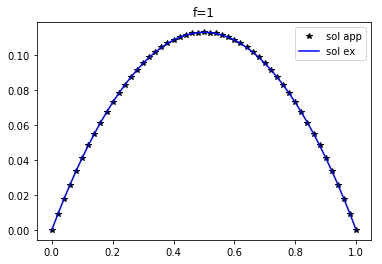

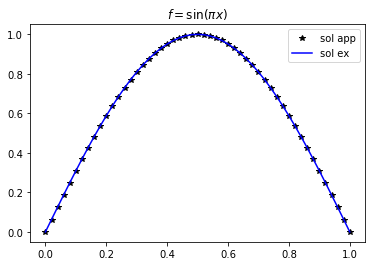

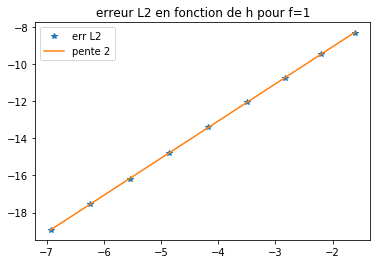

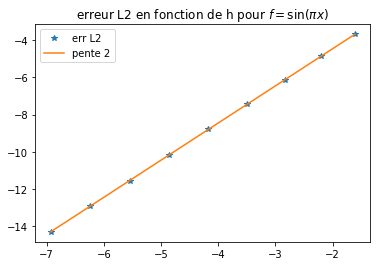

In [2]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

def K(n):
    h=1./(n+1)
    K=(1./h)*(2*np.eye(n)-np.eye(n,k=-1)-np.eye(n,k=1))
    return K

def M(n):
    h=1./(n+1)
    M=(h/6)*(4*np.eye(n)+np.eye(n,k=-1)+np.eye(n,k=1))
    return M

def F(n,f,x):
    h=1./(n+1)
    return h*f(x)

f1=lambda x: 0*x+1.
f2=lambda x: (1.+np.pi**2)*np.sin(np.pi*x)

def u1ex(x):
    return 1.-(np.exp(x)+np.exp(1-x))/(1.+np.exp(1))

def u2ex(x):
    return np.sin(np.pi*x)

a=0
b=1

n=49

x=np.linspace(a,b,n+2)

A=K(n)+M(n)

L1=F(n,f1,x[1:-1])
L2=F(n,f2,x[1:-1])

U1=np.linalg.solve(A,L1)
U2=np.linalg.solve(A,L2)

U1=np.append(0,np.append(U1,0))
U2=np.append(0,np.append(U2,0))

plt.figure(1)
plt.plot(x,U1,'k*',label='sol app')
#plt.hold(True)
plt.plot(x,u1ex(x),'b',label='sol ex')
plt.legend()
plt.title('f=1')
plt.show()

plt.figure(2)
plt.plot(x,U2,'k*',label='sol app')
#plt.hold(True)
plt.plot(x,u2ex(x),'b',label='sol ex')
plt.legend()
plt.title('$f=\sin(\pi x)$')
plt.show()

Err1=np.array([])
Err2=np.array([])
hh=np.array([])

for N in np.arange(2,11):
    n=2**N
    hh=np.append(hh,1./(n+1))
    x=np.linspace(a,b,n+2)
    MM=M(n)
    KK=K(n)
    A=KK+MM
    L1=F(n,f1,x[1:-1])
    L2=F(n,f2,x[1:-1])

    U1=np.linalg.solve(A,L1)
    U2=np.linalg.solve(A,L2)

    err1=(np.dot(U1-u1ex(x[1:-1]),np.dot(MM,U1-u1ex(x[1:-1]))))**(1./2)
    err2=(np.dot(U2-u2ex(x[1:-1]),np.dot(MM,U2-u2ex(x[1:-1]))))**(1./2)

    Err1=np.append(Err1,err1)
    Err2=np.append(Err2,err2)

plt.figure(3)
plt.plot(np.log(hh),np.log(Err1),'*',label='err L2')
plt.plot(np.log(hh),2*np.log(hh)+np.log(Err1[-1])-2*np.log(hh[-1]),label='pente 2')
plt.legend()
plt.title('erreur L2 en fonction de h pour f=1')
plt.show()

plt.figure(4)
plt.plot(np.log(hh),np.log(Err2),'*',label='err L2')
plt.plot(np.log(hh),2*np.log(hh)+np.log(Err2[-1])-2*np.log(hh[-1]),label='pente 2')
plt.legend()
plt.title('erreur L2 en fonction de h pour $f=\sin(\pi x)$')
plt.show()

**Q7) Convergence de la méthode.** Soit $u$ la solution exacte de $(P)$ et $\Pi_h u$ sont interpolé définie comme dans **Q6.** Montrer qu'il existe une constante C indépendante de $h$ tel que
$$
\|u-\Pi_h u\|_{L^2}\le C h^2\|u^{''}\|
$$
et
$$
\|u'-(\Pi_h u)'\|_{L^2}\le C h\|u^{''}\|.
$$
Conclure que la méthode converge en norme $H^1.$

## 2. Conditions aux limites mixtes.

Soit maintenant $p>0$ et considérons le problème 

$$
(\tilde{P})\left\{\begin{aligned}
&-u''(x)+u(x)=f(x),\ x\in ]0,1[,\\
&u(0)=0,\ u'(1)+pu(1)=0.
\end{aligned}
\right.
$$

**Q8)** Ecrire la formulation variationnelle de $\tilde{P}$ dans l'espace 
$$ 
\tilde{V} = \left\{ v \in L^2(]0,1[)\,:\, v' \in L^2(]0,1[),\ 
v(0)=0 \right\}.
$$

Pour approcher le problème $\tilde{P}$ on considère, avec les mêmes notations qu'avant, l'espace 
$$ 
\tilde{V}_h \ = \left \{ v_h \in C^0([0,1])\,\,:\,\ v_h\ \textrm{est affine sur } {[x_i,x_{i+1}]}  \textrm{ et } v_h(0)=0 \right \}.
$$

L'espace $\tilde{V}_h$ est un espace de dimension finie $n+1$ dont une base est constituée des fonctions $\psi_i,$  $i=1,\dots,n+1,$ avec  $\psi_{n+1}$ la fonction continue, affine sur $[x_i,x_{i+1}],$ pour tout $i,$ tel que $\psi_{n+1}(x_{n+1})=1,\ \psi_{n+1}(x_i)=0,\ $ pour $i=1,\dots,n.$

**Q9)**Re-écrire le problème variationnel discret associé à la formulation variationnelle trouvée dans **Q8**. Ecrire un programme donnant la solution approchée de $\tilde{P}$ dans le cas $p=1,$ $f=(\pi^2+1)\sin(\pi x)+\frac{\pi}{2}x,$ pour lequel la solution exacte de $\tilde{P}$ est donnée par $u(x)=\sin(\pi x)+\frac{\pi}{2}x.$ 
